## Final Project Submission

Please fill out:
* Student name: Phillip Ojo
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data became very unusable for my likeing. Now i will try the route of using API and webscrapping from TMDB website to attempt to retrive relevant data to use in my visulaization.

In [2]:
#Webscrapping TMDB website
!pip install fake_useragent
!pip install lxml
import fake_useragent
import lxml
from bs4 import BeautifulSoup
import requests

tmdb_webpage = 'https://www.themoviedb.org/movie/top-rated?page=0' 


In [3]:
#Check connection
response = requests.get(url= tmdb_webpage, timeout=3)
print('Status Code:', response.status_code)
if response.status_code == 200:
    print('Connection successfull.\n\n')
else:
    print('Error. Check Status code table.\n\n')

page_content = response.content
soup = BeautifulSoup(page_content, 'html.parser') 

Status Code: 200
Connection successfull.




In [4]:
#Function to load all the pages and scrap the data

def next_page(base_url):
    new_page_num = int(base_url.split('=')[-1]) +1
    base_url = base_url.split('=')[0] + '=' + str(new_page_num)
    return (base_url)

next_page(tmdb_webpage)

'https://www.themoviedb.org/movie/top-rated?page=1'

In [5]:
#Get Movie Specific Data
def scrape_movies_list(tmdb_webpage):
    
    base_movie_url = 'https://www.themoviedb.org/'
    movies_data = soup.find('section', id='media_results')
    movie_entries = movies_data.findAll('a', class_='image')
    movie_titles = []
    movie_pages = []
  
    
    for entry in movie_entries:    
        title = entry.get('title')
        ext_1 = entry.get('href').split('/movie/')
        ext_2 = title.replace(' ','-').replace('/','-')
        url = base_movie_url+'movie/'+ext_1[1]+'-'+ext_2
        movie_titles.append(title)
        movie_pages.append(url)

    return movie_titles

scrape_movies_list(tmdb_webpage)

[]

In [6]:
#Getting Movie Titles

specific_movie_data_1 = soup.find('div', class_= 'single_column')

def get_movie_titles(soup):
        try:
            title = specific_movie_data_1.find('h2').text.split('(')[0].strip()

        except:
            title = None 

        return title

get_movie_titles(soup)

In [7]:
#Getting the Movie Classification


def get_movie_classification(soup):
        try:
            classification = specific_movie_data_1.find('span', class_ = 'certification').text.strip()
    
        except:
            classification = None

        return classification



In [55]:
#Getting Genre List

def get_movie_genre(soup):
    try:
        
        for genre in specific_movie_data_1.find('span', class_ = 'genres').findAll('a'):
            genre_list.append(genre.text)

    except:
        genre_list = None

    return genre_list    



In [45]:
#Getting Release Date


def get_release_date(soup): 
    try:
        release_date = specific_movie_date_1.find('span', class_ = 'release').text.strip().split('(')[0]
    
    except:
        release_data = None
    
    return release_data

In [46]:
#Getting Average Movie Rating

def get_average_rating(soup):

    try:
        user_score = specific_movie_data_1.find('div', class_ = 'percent').find('span').get('class')[1].split('-r')[-1]
    
    except:
        user_score = None

In [ ]:

classification = []
genre_list = []
release_data = []
Average_movie_rating = [] 


for i in range(1,292):
    if i == 1:
        url = tmdb_webpage
    else:
            url = next_page(tmdb_webpage)

    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    
    
    titles += retrieve_titles(soup)
    star_ratings += retrieve_ratings(soup)
    prices += retrieve_prices(soup)
    avails += retrieve_availabilities(soup)
df = pd.DataFrame([titles, star_ratings, prices, avails]).transpose()
df.columns = ['Title', 'Star_Rating', 'Price_(pounds)', 'Availability']
print(len(df))
df.head()

Manipulating the dataset

In [3]:
tmdb_df = pd.read_csv('tmdb_webscraping.csv')
tmdb_df.head()

,£,title,release_date,genre,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,0,Dilwale Dulhania Le Jayenge,10/20/1995,"['Comedy', 'Drama', 'Romance']",3h 10m,U,88,Hindi,13200000.0,100000000.0,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,0,The Shawshank Redemption,10/14/1994,"['Drama', 'Crime']",2h 22m,R,87,English,25000000.0,28341469.0,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,0,The Godfather,03/15/1972,"['Drama', 'Crime']",2h 55m,R,87,English,6000000.0,245066411.0,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,0,Schindler's List,02/04/1994,"['Drama', 'History', 'War']",3h 15m,R,86,English,22000000.0,321365567.0,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,0,Your Name.,08/26/2016,"['Romance', 'Animation', 'Drama']",1h 46m,PG,86,Japanese,NaN,357986087.0,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']


##  Question #1 

We want to take a look at which movie rating category would be ideal to pursue. Compare the movie rating categories vs the total movie revenue for all the titles.

In [3]:
#Filter Rows by movie bu rated R
tmdb_df1 = tmdb_df[(tmdb_df.certification == "R") & (tmdb_df.user_score >= 70 ) ]


The dataset comes with alot of diffrent movie rating. This can present an issue when ploting so what we want to do is find all the unique values through out the ratings column. Once we get all the unique values we want to take out all the popular ones and group the reminaning ratings as "MISC". 

In [4]:
#Find all the diffrent types of movie rating.
tmdb_df['certification'].unique() #Gives us all the unique movie ratings

array(['U', 'R', 'PG', 'PG-13', '14', 'NR', '12', 'G', nan, '16', '15',
       'MA15+', '6', '12A', '12+', 'T', '18+', 'L', 'VM14', 'Livre', '0+',
       '15세 이상 관람가', '0', 'AL', 'M/12', '12세 이상 관람가', 'NC-17', '18',
       '전체관람가', 'e Livre', '청소년 관람불가', 'e 10', '11', '16+', '13', 'R15+',
       'M', '14A', 'M/14', 'APTA', '7', 'B', 'VM18', 'UA', 'R-15', 'Btl',
       'M18', 'A', 'TP', 'PG-12', '10', 'R18+', '14 Anos', 'KN', 'PG13',
       '13+', 'R21', 'NC16'], dtype=object)

In [6]:
Null_rankings= ['14','12','G','nan','16','15','MA15+','6','12A','12+','T','18+','L','VM14','Livre','0+','15세 이상 관람가','0','AL','M/12','12세 이상 관람가','NC-17','18','전체관람가', 'e Livre', '청소년 관람불가','e 10','11','16+','13','R15+','M','14A','M/14','APTA','7','B','VM18','UA','R-15','Btl','M18','A','TP','PG-12','10','R18+','14 Anos', 'KN','PG13','13+','R21','NC16']

tmdb_df['certification'].replace( Null_rankings, 'MISC' , inplace = True)
tmdb_df['certification'].unique()

array(['U', 'R', 'PG', 'PG-13', 'MISC', 'NR', nan], dtype=object)

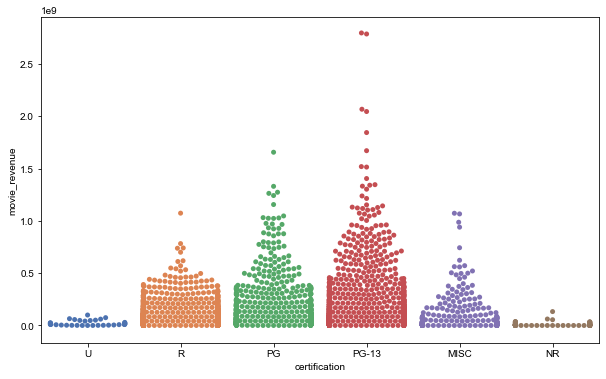

In [7]:
fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)

sns.set_style('darkgrid')
sns.set(font_scale =1.6)

ax = sns.swarmplot(data = tmdb_df, x= 'certification', y ='movie_revenue')

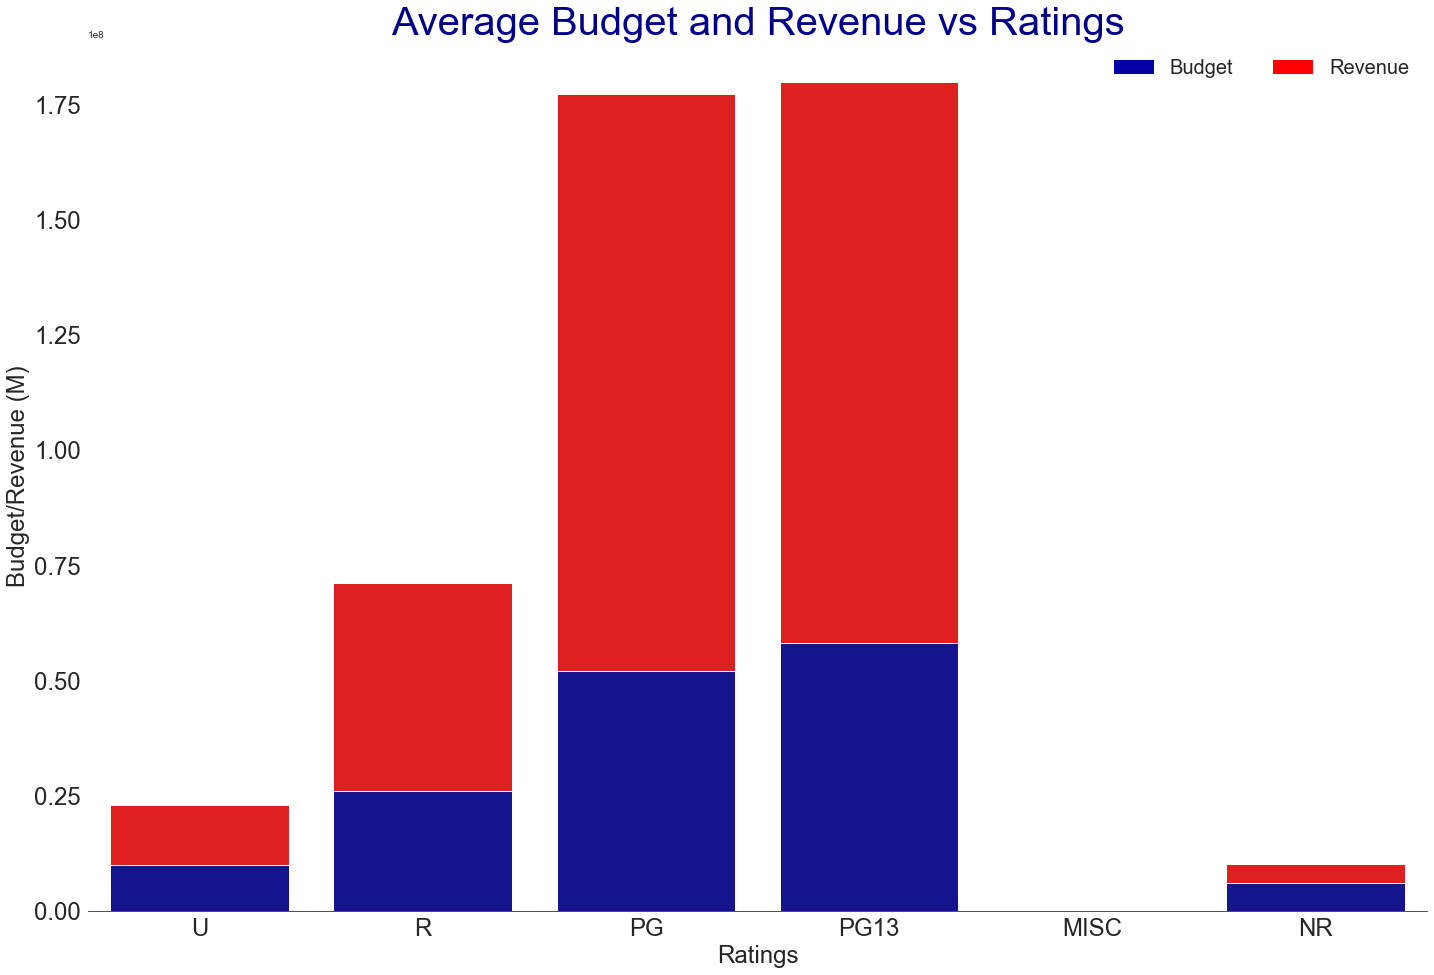

In [4]:
#Average Revenue Data

U_rev_df = tmdb_df[tmdb_df['certification'] == 'U']
U_rev_mean = round(U_rev_df['movie_revenue'].mean(),0)
R_rev_df = tmdb_df[tmdb_df['certification'] == 'R']
R_rev_mean = round(R_rev_df['movie_revenue'].mean(),0)
PG_rev_df = tmdb_df[tmdb_df['certification'] == 'PG']
PG_rev_mean = round(PG_rev_df['movie_revenue'].mean(),0)
PG13_rev_df = tmdb_df[tmdb_df['certification'] == 'PG-13']
PG13_rev_mean = round(PG13_rev_df['movie_revenue'].mean(),0)
MISC_rev_df = tmdb_df[tmdb_df['certification'] == 'MISC']
MISC_rev_mean = round(MISC_rev_df['movie_revenue'].mean(),0)
NR_rev_df = tmdb_df[tmdb_df['certification'] == 'NR']
NR_rev_mean = round(NR_rev_df['movie_revenue'].mean(),0)


#Average budget Data
U_budg_df = tmdb_df[tmdb_df['certification'] == 'U']
U_budg_mean = round(U_budg_df['movie_budget'].mean(),0)
R_budg_df = tmdb_df[tmdb_df['certification'] == 'R']
R_budg_mean = round(R_budg_df['movie_budget'].mean(),0)
PG_budg_df = tmdb_df[tmdb_df['certification'] == 'PG']
PG_budg_mean = round(PG_budg_df['movie_budget'].mean(),0)
PG13_budg_df = tmdb_df[tmdb_df['certification'] == 'PG-13']
PG13_budg_mean = round(PG13_budg_df['movie_budget'].mean(),0)
MISC_budg_df = tmdb_df[tmdb_df['certification'] == 'MISC']
MISC_budg_mean = round(MISC_budg_df['movie_budget'].mean(),0)
NR_budg_df = tmdb_df[tmdb_df['certification'] == 'NR']
NR_budg_mean = round(NR_budg_df['movie_budget'].mean(),0)

Buget = [U_budg_mean, R_budg_mean, PG_budg_mean, PG13_budg_mean, MISC_budg_mean, NR_budg_mean]
Revenue = [U_rev_mean, R_rev_mean, PG_rev_mean, PG13_rev_mean, MISC_rev_mean, NR_rev_mean]

Ratings = ["U", "R", "PG", "PG13", "MISC","NR"]

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 16)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = Ratings, y = Revenue, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = Ratings, y = Buget, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Budget', 'Revenue'], loc=1, ncol = 2, prop={'size':20})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Budget/Revenue (M)")
bottom_plot.set_xlabel("Ratings")
plt.title('Average Budget and Revenue vs Ratings' , fontsize = 40, color = 'darkblue')

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(24)

In [9]:
tmdb_df.dtypes



£                      int64
title                 object
release_date          object
genre                 object
run_time              object
certification         object
user_score             int64
original_language     object
movie_budget         float64
movie_revenue        float64
keywords              object
actors                object
director_list         object
dtype: object

In [43]:
tmdb_df.dtypes

£                      int64
title                 object
release_date           int64
genre                 object
run_time              object
certification         object
user_score             int64
original_language     object
movie_budget         float64
movie_revenue        float64
keywords              object
actors                object
director_list         object
dtype: object

In [5]:
#Changing the str format of the date to a Datetime format
tmdb_df['release_date'] = tmdb_df.release_date.str.replace(' ', '')

In [12]:
tmdb_df.loc[0, 'release_date']



'10/20/1995'

In [6]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], format = '%m/%d/%Y')

tmdb_df.dtypes

£                             int64
title                        object
release_date         datetime64[ns]
genre                        object
run_time                     object
certification                object
user_score                    int64
original_language            object
movie_budget                float64
movie_revenue               float64
keywords                     object
actors                       object
director_list                object
dtype: object

In [10]:
#Now lets filter out the years by Decade. 70s-80s, 80s-90s, 90s-00s, 00s-10s, 10s-20s

tmdb_df['release_date'] = tmdb_df.release_date.dt.year
tmdb_df.head()

,£,title,release_date,genre,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,0,Dilwale Dulhania Le Jayenge,1995,"['Comedy', 'Drama', 'Romance']",3h 10m,U,88,Hindi,13200000.0,100000000.0,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,0,The Shawshank Redemption,1994,"['Drama', 'Crime']",2h 22m,R,87,English,25000000.0,28341469.0,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,0,The Godfather,1972,"['Drama', 'Crime']",2h 55m,R,87,English,6000000.0,245066411.0,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,0,Schindler's List,1994,"['Drama', 'History', 'War']",3h 15m,R,86,English,22000000.0,321365567.0,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,0,Your Name.,2016,"['Romance', 'Animation', 'Drama']",1h 46m,PG,86,Japanese,NaN,357986087.0,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']


In [11]:
#Create Decades

decade1 = 1970
decade2 = 1980
decade3 = 1990
decade4 = 2000
decade5 = 2010
decade6 = 2020

In [12]:
decade1_df = tmdb_df[tmdb_df.release_date.between(decade1,decade2)]
print(len(decade1_df),   'movies in 70s')

decade2_df = tmdb_df[tmdb_df.release_date.between(decade2,decade3)]
print(len(decade2_df), 'movies in 80s')

decade3_df = tmdb_df[tmdb_df.release_date.between(decade3,decade4)]
print(len(decade3_df), 'movies in 90s')

decade4_df = tmdb_df[tmdb_df.release_date.between(decade4,decade5)]
print(len(decade4_df), 'movies in 00s')

decade5_df = tmdb_df[tmdb_df.release_date.between(decade5,decade6)]
print(len(decade5_df), 'movies in 10s')

201 movies in 70s
441 movies in 80s
875 movies in 90s
1843 movies in 00s
2594 movies in 10s


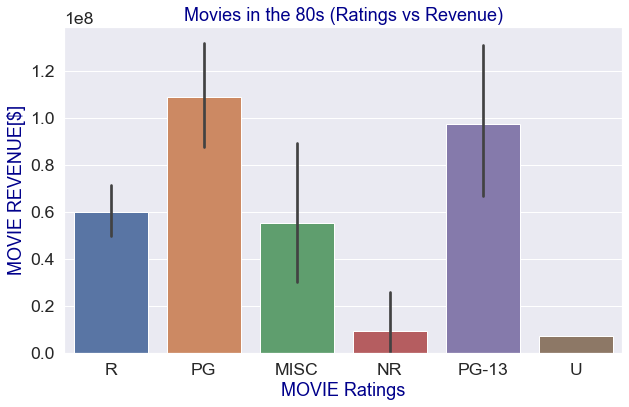

In [22]:
fig_dims = (10,6)
fig, ax1 = plt.subplots(figsize = fig_dims)

sns.set_style('darkgrid')
sns.set(font_scale =1.6)

ax1 = sns.barplot(data = decade2_df, x= 'certification', y ='movie_revenue' )
plt.title('Movies in the 80s (Ratings vs Revenue)' , fontsize = 18, color = 'darkblue')
plt.ylabel('MOVIE REVENUE[$]',fontsize=18, color = 'darkblue')
plt.xlabel('MOVIE Ratings',fontsize=18, color = 'darkblue')
ax1 = plt.gca()
#ax1.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
plt.show()

Now lastly we will look at the relationship between each Genere movie budget and revenue over the different decades to see if anything stands out.


In [39]:
decade1_df.drop('£', axis= 1)

,title,release_date,genre,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
2,The Godfather,1972,"['Drama', 'Crime']",2h 55m,R,87,English,6000000.0,245066411.0,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
5,The Godfather: Part II,1974,"['Drama', 'Crime']",3h 22m,R,86,English,13000000.0,102600000.0,"['italy', 'italian american', 'cuba', 'melanch...","['Al Pacino', 'Robert Duvall', 'Diane Keaton',...",['Francis Ford Coppola']
22,One Flew Over the Cuckoo's Nest,1975,['Drama'],2h 13m,R,84,English,3000000.0,108981275.0,"['nurse', 'based on novel or book', 'oregon, u...","['Jack Nicholson', 'Louise Fletcher', 'Danny D...",['Miloš Forman']
35,The Empire Strikes Back,1980,"['Adventure', 'Action', 'Science Fiction']",2h 4m,PG,84,English,18000000.0,538400000.0,"['rebel', 'android', 'asteroid', 'spacecraft',...","['Mark Hamill', 'Harrison Ford', 'Carrie Fishe...",['Irvin Kershner']
43,Tokyo Story,1972,['Drama'],2h 14m,NR,83,Japanese,NaN,NaN,"['coma', 'beach', 'baby', 'fish', 'boat', 'off...","['Chishū Ryū', 'Chieko Higashiyama', 'Setsuko ...",['Yasujirō Ozu']
...,...,...,...,...,...,...,...,...,...,...,...,...
4790,1941,1979,['Comedy'],1h 58m,PG,58,English,35000000.0,31755742.0,"['submarine', 'california', 'world war ii', 'w...","['Dan Aykroyd', 'Ned Beatty', 'John Belushi', ...",['Steven Spielberg']
4956,Battle for the Planet of the Apes,1973,"['Action', 'Science Fiction']",1h 33m,MISC,57,English,1700000.0,8844595.0,"['post-apocalyptic future', 'dystopia', 'ape']","['Roddy McDowall', 'Natalie Trundy', 'Austin S...",['J. Lee Thompson']
5310,Caligula,1980,"['Drama', 'History', 'Romance']",2h 36m,R,55,English,17500000.0,23438120.0,"['italy', 'assassination', 'rape', 'sexuality'...","['Malcolm McDowell', 'Teresa Ann Savoy', 'Hele...","['Giancarlo Lui', 'Tinto Brass', 'Bob Guccione']"
5463,Popeye,1980,"['Action', 'Adventure', 'Comedy', 'Family']",1h 54m,PG,53,English,20000000.0,49823037.0,"['baby', 'blackmail', 'octopus', 'tax collecto...","['Robin Williams', 'Shelley Duvall', 'Ray Wals...",['Robert Altman']


In [51]:
example = decade1_df.genre.map(lambda x: x.replace("[", "").replace("]", "").split(","))
example

2                                  ['Drama',  'Crime']
5                                  ['Drama',  'Crime']
22                                           ['Drama']
35        ['Adventure',  'Action',  'Science Fiction']
43                                           ['Drama']
                             ...                      
4790                                        ['Comedy']
4956                    ['Action',  'Science Fiction']
5310                 ['Drama',  'History',  'Romance']
5463    ['Action',  'Adventure',  'Comedy',  'Family']
5740     ['Horror',  'Thriller',  'Fantasy',  'Drama']
Name: genre, Length: 201, dtype: object

In [87]:
copydecade1_df = decade1_df.copy()
copydecade1_df['genre_explode'] = copydecade1_df.genre.map(lambda x: x.replace("[", "").replace("]", "").replace(" ", "").split(","))

copydecade1_df =copydecade1_df.explode('genre_explode')
copydecade1_df.groupby('genre_explode')['movie_budget', 'movie_revenue'].aggregate('mean')


,movie_budget,movie_revenue
genre_explode,,
'Action',9.597812e+06,1.193068e+08
'Adventure',1.075145e+07,1.392757e+08
'Animation',5.866667e+06,3.862656e+07
'Comedy',6.686355e+06,5.813325e+07
'Crime',5.522083e+06,4.766851e+07
'Drama',6.858806e+06,6.217395e+07
'Family',9.650000e+06,4.222488e+07
'Fantasy',5.988889e+06,3.490721e+07
'History',8.609200e+06,3.641919e+07


In [88]:
genre_explode = copydecade1_df['genre_explode']
movie_budget = copydecade1_df['movie_budget']
movie_revenue = copydecade1_df['movie_revenue']

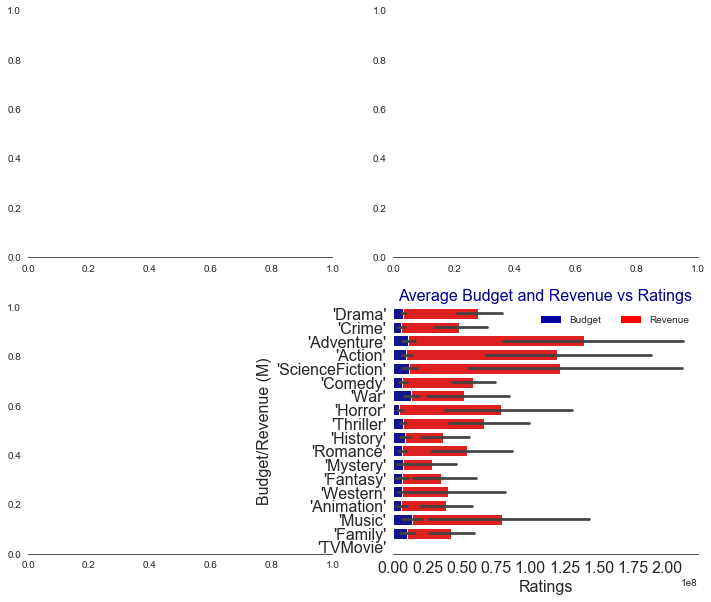

In [105]:

#Set general plot properties
fig, ax = plt.subplots(figsize=(12,10), ncols=2, nrows=2)
sns.set_style("white")
sns.set_context({"figure.figsize": (12, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = copydecade1_df['movie_revenue'], y = genre_explode, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = movie_budget, y = genre_explode, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Budget', 'Revenue'], loc=1, ncol = 2, prop={'size':10})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Budget/Revenue (M)")
bottom_plot.set_xlabel("Ratings")
plt.title('Average Budget and Revenue vs Ratings' , fontsize = 16, color = 'darkblue')

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

In [ ]:
decade1_df

In [54]:
decade1_df.groupby('release_date')['movie_budget', 'movie_revenue'].aggregate('mean')

,movie_budget,movie_revenue
release_date,,
1970,4.994444e+06,5.989065e+07
1971,4.081800e+06,2.608536e+07
1972,3.056923e+06,5.048352e+07
1973,5.028467e+06,7.194993e+07
1974,4.621364e+06,5.566779e+07
1975,3.526250e+06,8.148202e+07
1976,5.879167e+06,4.762799e+07
1977,8.717077e+06,1.679388e+08
1978,9.588077e+06,8.036283e+07
